# 04.01 - DATA EXPLORATION

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

In [ ]:
!rm -rf Proyecto-IA

In [ ]:
!git clone https://github.com/lisszea/Proyecto-IA
import pandas as pd
import json
kaggle = pd.read_csv('Proyecto-IA/kaggle.json')

Cloning into 'Proyecto-IA'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 18 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), 982.93 KiB | 5.49 MiB/s, done.


In [ ]:
!mv Proyecto-IA/kaggle.json kaggle.json

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c santander-customer-transaction-prediction


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
santander-customer-transaction-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)



## Based on [Kaggle House Pricing Prediction Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/)

- Inspect and learn from the competition [Notebooks](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/notebooks)
- You must make available to this notebook the `train.csv` file from the competition [data](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) section. If running this notebook in Google Colab you must upload it in the notebook files section in Colab.

In [ ]:
## KEEPOUTPUT
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
!unzip santander-customer-transaction-prediction.zip
d = pd.read_csv("train.csv")
d.head()

Archive:  santander-customer-transaction-prediction.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [ ]:
## KEEPOUTPUT
d.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [ ]:
## KEEPOUTPUT
for c in d.columns:
    print ("%20s"%c, d[c].dtype)

             ID_code object
              target int64
               var_0 float64
               var_1 float64
               var_2 float64
               var_3 float64
               var_4 float64
               var_5 float64
               var_6 float64
               var_7 float64
               var_8 float64
               var_9 float64
              var_10 float64
              var_11 float64
              var_12 float64
              var_13 float64
              var_14 float64
              var_15 float64
              var_16 float64
              var_17 float64
              var_18 float64
              var_19 float64
              var_20 float64
              var_21 float64
              var_22 float64
              var_23 float64
              var_24 float64
              var_25 float64
              var_26 float64
              var_27 float64
              var_28 float64
              var_29 float64
              var_30 float64
              var_31 float64
              var

In [ ]:
## KEEPOUTPUT
k = d.isna().sum()
k[k!=0]

Series([], dtype: int64)

data size

In [ ]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('train.csv')

# Seleccionar las primeras 50 columnas y las primeras 10000 filas
df_recortado = df.iloc[:10000,:50]

# Guardar el conjunto de datos recortado en un nuevo archivo CSV
df_recortado.to_csv('train_recortado.csv', index=False)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

#Datos categorizados

# Cargar datos en un DataFrame
data = pd.read_csv('train_recortado.csv')

# Obtener lista de columnas a procesar
columnas_procesar = list(data.columns)

# Determinar número de categorías deseadas
n_categorias = 5

# Determinar número de columnas a convertir en categóricas
n_columnas_categoricas = int(0.1 * len(columnas_procesar))

# Seleccionar de manera aleatoria columnas a convertir en categóricas
columnas_categoricas = np.random.choice(columnas_procesar, n_columnas_categoricas, replace=False)

# Procesar cada columna categórica
for columna in columnas_categoricas:
    # Crear objeto KMeans con número de categorías deseado
    kmeans = KMeans(n_clusters=n_categorias)

    # Ajustar KMeans a los datos de la columna continua
    kmeans.fit(data[columna].values.reshape(-1, 1))

    # Crear nueva columna en el DataFrame con las categorías asignadas por K-means
    data[columna + '_categorica'] = kmeans.labels_

    # Reemplazar columna original con la columna categórica creada por K-means
    data[columna] = data[columna + '_categorica']

    # Eliminar columna temporal creada
    data = data.drop(columns=[columna + '_categorica'])


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [ ]:
#Crear los datos faltantes

df_recortado=data

# Calcular el número total de celdas en el conjunto de datos
num_celdas = df_recortado.shape[0] * df_recortado.shape[1]

# Calcular el número de celdas que deben estar ausentes para que el 5% de los valores estén ausentes
num_celdas_faltantes = round(num_celdas * 0.05)

# Crear una lista de columnas aleatorias para aplicar los valores ausentes
columnas_faltantes = np.random.choice(df_recortado.columns, size=3, replace=False)

# Recorrer las columnas aleatorias y aplicar los valores ausentes
for col in columnas_faltantes:
    # Crear una lista de índices de fila aleatorios para aplicar los valores ausentes
    filas_faltantes = np.random.choice(df_recortado.index, size=num_celdas_faltantes, replace=True)
    # Seleccionar las celdas aleatorias y reemplazar sus valores con NaN
    df_recortado.loc[filas_faltantes, col] = np.nan

# Guardar el conjunto de datos modificado en un nuevo archivo CSV
df_recortado.to_csv('train_recortado_con_faltantes.csv', index=False)


In [ ]:
## KEEPOUTPUT
d = df_recortado
print (d.shape)

(10000, 50)


Missing values in columns

In [ ]:
## KEEPOUTPUT
k = d.isna().sum()
k[k!=0]

var_26    9185
var_42    9166
var_43    9181
dtype: int64

In [ ]:
d.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.6667,3.8743,-5.2387,7.3746,NaN,NaN,11.6418,-7.0170,5.9226,-14.2136
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,10.8160,3.6783,-11.1147,1.8730,NaN,11.7842,1.2444,-47.3797,7.3718,0.1948
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,10.8917,0.9003,-13.5174,2.2439,NaN,12.0406,4.1006,-7.9078,11.1405,-5.7864
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,9.1738,0.6665,-3.8294,-1.0370,NaN,NaN,8.0485,-24.6840,12.7404,-35.1659
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,19.3038,1.4450,-5.5963,14.0685,NaN,NaN,6.9087,-65.4863,13.8657,0.0444


In [ ]:
for col in data.columns:
  if data[col].dtype != float:
    print(col)

ID_code
target
var_1
var_21
var_27
var_35


In [ ]:
data['var_27']

0       4
1       0
2       0
3       2
4       3
       ..
9995    2
9996    0
9997    4
9998    3
9999    2
Name: var_27, Length: 10000, dtype: int32

## Inspect the target variable

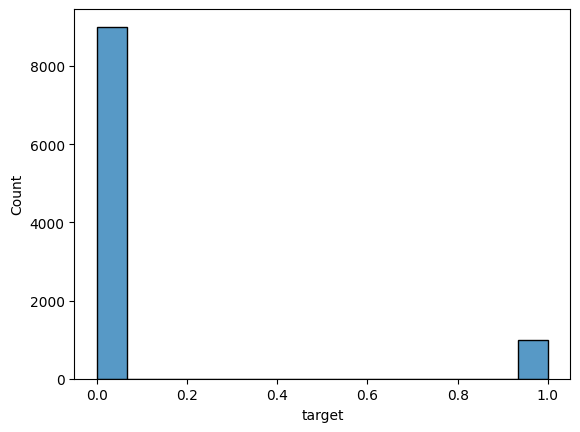

In [ ]:
## KEEPOUTPUT
sns.histplot(d['target']);


## Discover data types

In [ ]:
## KEEPOUTPUT
for c in d.columns:
    print ("%20s"%c, d[c].dtype)

             ID_code object
              target int64
               var_0 float64
               var_1 float64
               var_2 float64
               var_3 float64
               var_4 float64
               var_5 float64
               var_6 float64
               var_7 float64
               var_8 float64
               var_9 float64
              var_10 float64
              var_11 float64
              var_12 float64
              var_13 float64
              var_14 float64
              var_15 float64
              var_16 float64
              var_17 float64
              var_18 int32
              var_19 float64
              var_20 float64
              var_21 float64
              var_22 float64
              var_23 float64
              var_24 int32
              var_25 int32
              var_26 float64
              var_27 float64
              var_28 float64
              var_29 float64
              var_30 float64
              var_31 float64
              var_32 fl

## Inspect numeric columns

In [ ]:
## KEEPOUTPUT
d._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
target,10000.0,0.099400,0.299213,0.0000,0.000000,0.00000,0.000000,1.0000
var_0,10000.0,10.672717,3.041680,1.3350,8.452675,10.51575,12.759675,19.2893
var_1,10000.0,-1.621588,4.077271,-13.4227,-4.779075,-1.60070,1.360375,8.5849
var_2,10000.0,10.709760,2.638402,3.3090,8.723700,10.54320,12.517650,18.3477
var_3,10000.0,6.796787,2.045605,1.1541,5.253625,6.82085,8.323000,12.9773
var_4,10000.0,11.089333,1.624462,5.9430,9.878450,11.10835,12.276350,15.3664
var_5,10000.0,-5.035794,7.850295,-29.0133,-11.202600,-4.85275,1.004025,17.2516
var_6,10000.0,5.403145,0.870482,2.6733,4.766850,5.38770,5.998100,7.8755
var_7,10000.0,16.621291,3.434960,7.6422,14.007650,16.58205,19.190900,26.9656
var_8,10000.0,0.284163,3.314391,-9.9911,-2.266200,0.31625,2.914325,9.1038


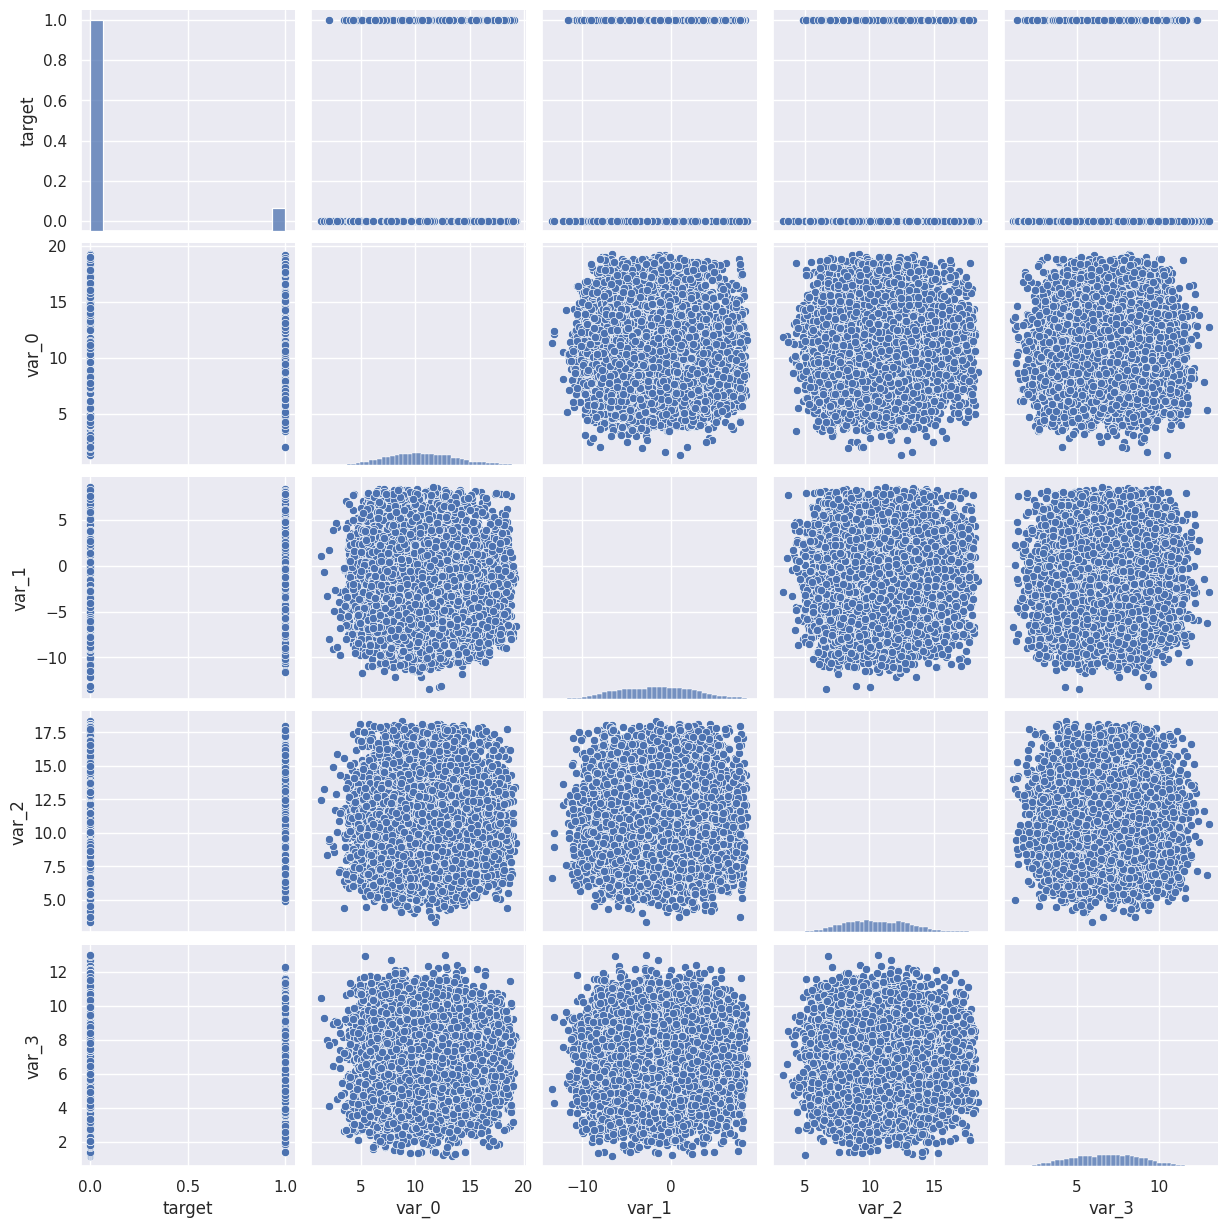

In [ ]:
## KEEPOUTPUT
cols = d.columns[: 6] 
sns.set()
sns.pairplot(d[cols])

### correlations

<ipython-input-27-d63c824516b7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = d.corr()


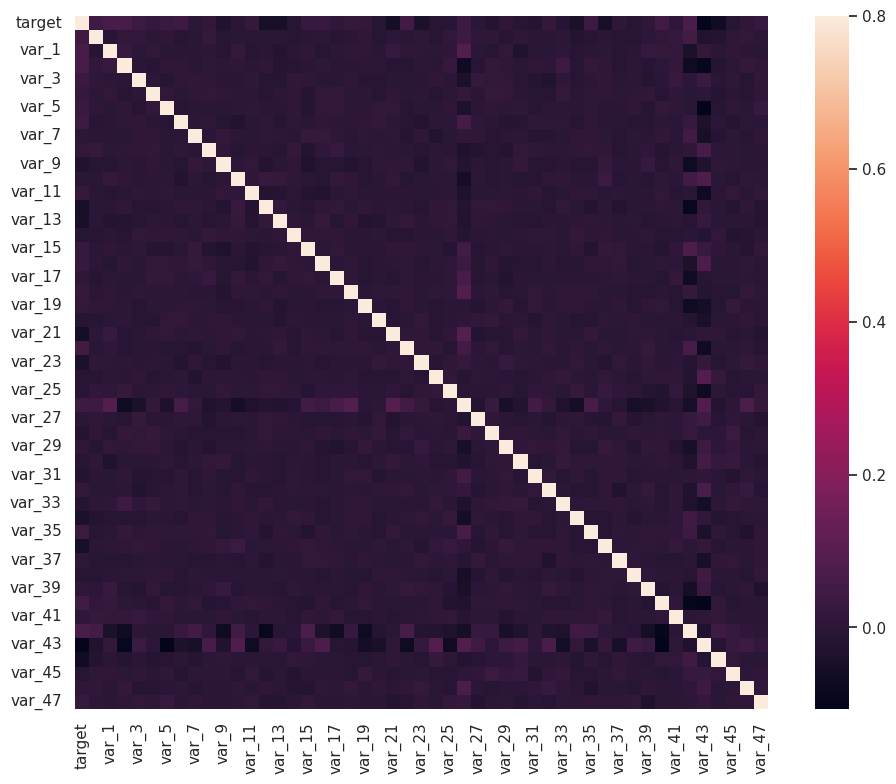

In [ ]:
## KEEPOUTPUT
#correlation matrix
corrmat = d.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

## Inspect categorical variables

In [ ]:
## KEEPOUTPUT
ccols = [i for i in d.columns if not i in d._get_numeric_data()]
print (ccols)

['ID_code']


In [ ]:
## KEEPOUTPUT
for c in ccols:
    print ("%10s"%c, np.unique(d[c].dropna()))

   ID_code ['train_0' 'train_1' 'train_10' ... 'train_9997' 'train_9998' 'train_9999']


In [ ]:
## KEEPOUTPUT
c="var_47"
d[c].value_counts()

-13.7362    2
-1.1070     2
-7.6343     2
 0.8512     2
-13.9592    2
           ..
-13.3414    1
 4.1641     1
-6.9327     1
-6.6340     1
-1.9959     1
Name: var_47, Length: 9866, dtype: int64

In [ ]:
## KEEPOUTPUT
plt.figure(figsize=(1000,1))
for i,c in enumerate(["var_21"]):    
    plt.subplot(1,2,i+1) # actualización para tener solo 1 fila y 2 columnas
    k=d[[c,"target"]][:1000].dropna()
    for v in d[c][:1000].dropna().unique():
        sns.histplot(k.target[k[c]==v], label=v);
        plt.title(c)
    plt.yticks([])
    plt.legend()
    plt.subplot(1,2,i+2) # actualización para tener solo 1 fila y 2 columnas
    vc = k[c].value_counts()
    sns.barplot(x=vc.index, y=vc.values)    
    plt.xticks(range(len(vc)), vc.index, rotation="vertical")

NameError: ignored

## Vision on mission values

Missing values in columns